## Algoritmos de clustering
   
    # Fuzzy C-Means - FCM
    # Kernel Fuzz C-Means - KFCM-K
    # Variable-Wise Kernel Fuzz C-Means - VKFCM-K
   
#### No dataset Image_Segmentation UCI
##### http://archive.ics.uci.edu/ml/datasets/image+segmentation

In [4]:
import numpy as np
import pandas as pd

# Algoritmos de cluster
from fcm import FCM
from kfcm import KFCM
from vkfcm import VKFCM

# Algoritmo base para comparação K-Means
from sklearn.cluster import KMeans

# metricas
from sklearn.metrics import adjusted_rand_score

# plot
from matplotlib import pyplot as plt

### Read data

In [5]:
df = pd.read_csv("./data/segmentation.test")
df.head(5)

,CLASSE,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,GRASS,110.0,189.0,9,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,GRASS,86.0,187.0,9,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,GRASS,225.0,244.0,9,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,GRASS,47.0,232.0,9,0.0,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,GRASS,97.0,186.0,9,0.0,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654


### Analise da base

In [6]:
df.describe()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
count,2100.000000,2100.000000,2100.0,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2.100000e+03,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,124.940476,123.483333,9.0,0.014921,0.004550,1.890820,5.708299,2.406772,7.904224e+00,37.047654,32.806667,44.205556,34.130741,-12.722963,21.473704,-8.750741,45.162381,0.427259,-1.365147
std,72.858637,57.431428,0.0,0.041024,0.023573,2.649453,44.989359,3.469954,5.347107e+01,38.135291,34.994538,43.510119,36.303768,11.588214,19.654107,11.606996,42.900582,0.228458,1.544278
min,1.000000,11.000000,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,-1.589457e-08,0.000000,0.000000,0.000000,0.000000,-49.666668,-12.444445,-33.888890,0.000000,0.000000,-3.044175
25%,62.000000,81.000000,9.0,0.000000,0.000000,0.722222,0.349603,0.833332,4.216377e-01,7.472222,7.000000,9.666667,6.222222,-18.583333,4.305556,-17.000000,11.777778,0.284934,-2.188539
50%,121.000000,122.000000,9.0,0.000000,0.000000,1.277776,0.833333,1.444444,9.897442e-01,21.666666,19.666668,27.777779,20.444445,-10.888889,19.666666,-11.000000,28.666666,0.375064,-2.052625
75%,188.250000,171.250000,9.0,0.000000,0.000000,2.222221,1.807406,2.555556,2.251852e+00,53.277778,47.333332,65.000000,46.388888,-4.222222,36.111110,-3.222222,65.000000,0.540228,-1.565745
max,254.000000,251.000000,9.0,0.333333,0.222222,29.222221,991.718400,44.722225,1.386329e+03,143.444440,137.111110,150.888890,142.555560,9.888889,82.000000,24.666666,150.888890,1.000000,2.912480


In [7]:
# Classe balanceada
df['CLASSE'].value_counts()

PATH         300
BRICKFACE    300
CEMENT       300
WINDOW       300
FOLIAGE      300
SKY          300
GRASS        300
Name: CLASSE, dtype: int64

### Removendo atributo REGION-PIXEL-COUNT

In [8]:
df = df.drop(columns=['REGION-PIXEL-COUNT'])
df.head(1)

,CLASSE,REGION-CENTROID-COL,REGION-CENTROID-ROW,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,GRASS,110.0,189.0,0.0,0.0,1.0,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864


### A base será analisada por 2 Views
     Shape view - 9 primeiros atributos
     RGB view - 10 ultimso atributos

In [9]:
df.shape

(2100, 19)

In [10]:
shape_view = df.iloc[:, 1:-10]
rgb_view =  df.iloc[:, -10:]
target = df.iloc[:, 0]

In [11]:
shape_view.head(1)

,REGION-CENTROID-COL,REGION-CENTROID-ROW,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD
0,110.0,189.0,0.0,0.0,1.0,0.666667,1.222222,1.186342


In [12]:
rgb_view.head(1)

,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864


## Cluster parameters

In [13]:
num_clusters = 7
m = 1.6
max_iter = 150 
e =10^(-10)

### Random

In [36]:
y_pred = np.random.randint(0, 7, 2100)
print("Rand index - Random: ", adjusted_rand_score(target, y_pred))

Rand index - Random:  -0.00031281414179075174


### Kmeans

In [38]:
kmeans_shape = KMeans(n_clusters=7)
kmeans_shape.fit(shape_view.values)

kmeans_rgb = KMeans(n_clusters=7)
kmeans_rgb.fit(rgb_view.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
y_pred = kmeans_shape.predict(shape_view)
print("Rand Index - Kmeans: ", adjusted_rand_score(target, y_pred))

y_pred = kmeans.predict(rgb_view)
print("Rand Index - Kmeans: ", adjusted_rand_score(target, y_pred))

Rand Index - Kmeans:  0.16833338790413166
Rand Index - Kmeans:  0.39905352742473177


### VKFCM

In [22]:
# Shape View
print("Start Shape View")
vkfcm_shape = VKFCM(shape_view.values, 7, m=1.6)

cost_shape = []
for i in range(100):
    vkfcm_shape.update_centroids()
    vkfcm_shape.update_weights()
    vkfcm_shape.update_membership()
    cost_shape.append(vkfcm_shape.cost_function())

# rgb view
print("Start RGB View")
vkfcm_rgb = VKFCM(rgb_view.values, 7, m=1.6)

cost_rgb = []
for i in range(100):
    vkfcm_rgb.update_centroids()
    vkfcm_rgb.update_weights()
    vkfcm_rgb.update_membership()
    cost_rgb.append(vkfcm_rgb.cost_function())

Start Shape View
Start RGB View


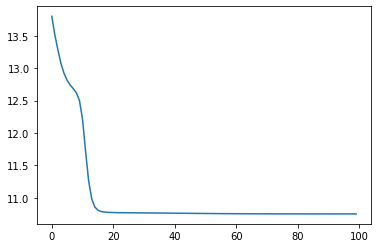

In [23]:
plt.plot(cost_shape)

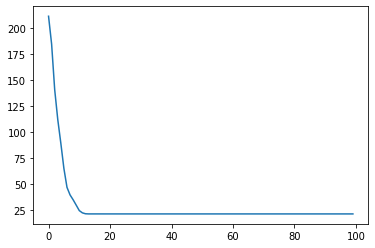

In [24]:
plt.plot(cost_rgb)

### Rand index

In [25]:
y_pred = vkfcm_shape.crisp()
print("Rand: ", adjusted_rand_score(target, y_pred))

y_pred = vkfcm_rgb.crisp()
print("Rand: ", adjusted_rand_score(target, y_pred))

Rand:  0.17118287649783925
Rand:  0.5123373927210952
